# Overview of the Dataset

The "Target" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 420 male patient records and 140 female patient records.


Columns:

```python

Age of the patient
Gender of the patient
Total Bilirubin
Direct Bilirubin
Alkaline Phosphotase
Alamine Aminotransferase
Aspartate Aminotransferase
Total Protiens
Albumin
Albumin and Globulin Ratio
Dataset: field used to split the data into two sets (patient with liver disease, or no disease)
Acknowledgements
This dataset was downloaded from the UCI ML Repository:


Inspiration:

Use these patient records to determine which patients have liver disease and which ones do not.

### Importing the libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, auc, roc_auc_score)

In [154]:
df=pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [155]:
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [156]:
print(df.shape)

(583, 11)


In [157]:
# Checking for missing  value 

print(df.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [158]:
# filling the empty cell by using mean
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio']).mean()


In [159]:
# Again checking for missing value 

print(df.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [160]:
# Checking duplicates
dups = df.duplicated().sum()
print(f"\n Number of duplicate rows:",dups)
if dups > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)


 Number of duplicate rows: 13
Duplicates removed. New shape: (570, 11)


In [161]:
# gender to numeric 
le = LabelEncoder()
df['gender_enc'] = le.fit_transform(df['Gender'])  # Male=1, Female=0 
print("\nGender mapping (LabelEncoder classes):", le.classes_)


Gender mapping (LabelEncoder classes): ['Female' 'Male']


In [162]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,gender_enc
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.947064,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.947064,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.947064,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,0.947064,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.947064,1,1


In [163]:
# Convert target column: 1 is disease, 0 is no disease
df['target'] = df['Dataset'].apply(lambda x: 1 if x == 1 else 0)

In [164]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,gender_enc,target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.947064,1,0,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.947064,1,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.947064,1,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,0.947064,1,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.947064,1,1,1


In [165]:
# Confirming the mapping
print(df['target'].value_counts())

target
1    406
0    164
Name: count, dtype: int64


In [166]:
df = df.drop(['Gender','Dataset'], axis=1)

In [167]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,gender_enc,target
0,65,0.7,0.1,187,16,18,6.8,3.3,0.947064,0,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.947064,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.947064,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,0.947064,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.947064,1,1


# Split the Dataset (Train-Test Split)

In [168]:
X = df.drop(columns=["target"])
y = df["target"]

In [169]:
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=100,stratify=y)   #stratify ensures class balance

# M1 ---> Logistic Regression

### Feature Scaling (Standardization)

In [170]:
scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [171]:
log_reg=LogisticRegression()
# Train the model
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [172]:
# Predict
log_pred = log_reg.predict(X_test_scaled)
log_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

# Evaluation Metrics (for Logistic Regression)

In [173]:
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred))

Accuracy: 0.7309941520467836
Precision: 0.7467532467532467
Recall: 0.9426229508196722
F1 Score: 0.8333333333333334


Interpretation: 

- The Logistic Regression model achieved an accuracy of 73.1%. 
- The precision of 74.7% indicates that the model’s predictions of liver disease are correct most of the time.
- The recall value of 94.26% is significantly high, showing that the model is very effective at identifying patients with liver disease and rarely misses a true case.
- This is critical in medical applications where false negatives must be minimized.
- The F1 Score of 83.3% demonstrates a strong balance between precision and recall.
- Overall, Logistic Regression performs well on this dataset and shows strong capability in detecting liver disease cases.


In [174]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_pred))


Confusion Matrix:
[[ 10  39]
 [  7 115]]


Interpretation:

- True Negative (10): The model correctly identified 10 patients as not having liver disease.
- False Positive (39): The model incorrectly flagged 39 healthy patients as having liver disease.
- False Negative (7): The model missed 7 liver disease cases by predicting them as healthy.
- True Positive (115): The model correctly detected 115 liver disease patients.


In [175]:
class_report = classification_report(y_test,log_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.59      0.20      0.30        49
           1       0.75      0.94      0.83       122

    accuracy                           0.73       171
   macro avg       0.67      0.57      0.57       171
weighted avg       0.70      0.73      0.68       171



# Interpretation:

- The Logistic Regression model achieves an overall accuracy of 73%.
- It performs very well in detecting liver disease, with a recall of 94% and an F1 score of 0.83 for class 1. This means the model rarely misses a patient who actually has liver disease, which is extremely important for medical diagnosis.
- However, the model struggles with class 0 (no liver disease), achieving only 20% recall.This indicates that the model often misclassifies healthy patients as having liver disease.
- The macro-average F1 score of 0.57 reflects this imbalance.
- Overall, the model is excellent at identifying diseased patients but weak at identifying healthy ones.


# Checking for class imbalance

In [176]:
from collections import Counter
print(Counter(y))  

Counter({1: 406, 0: 164})


In [177]:
from imblearn.over_sampling import SMOTE
# train_test_split is already imported in an earlier cell; no need to re-import

Since  the dataset is not balanced Here SMOT ability to detect both classes fairly by generating synthetic examples for the minority class

In [178]:
s=SMOTE()
X_train_balance,y_train_balance=s.fit_resample(X_train,y_train)

In [179]:
Counter(y_train_balance)

Counter({1: 284, 0: 284})

## Retraining to check the balanced dataset

In [180]:
lr_bal=LogisticRegression()
# Train the model
lr_bal.fit(X_train_balance, y_train_balance)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [181]:
# Predict
lr_pred_bal = lr_bal.predict(X_test_scaled)
lr_pred_bal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [182]:
print("Accuracy:", accuracy_score(y_test, lr_pred_bal))
print("Precision:", precision_score(y_test, lr_pred_bal))
print("Recall:", recall_score(y_test, lr_pred_bal))
print("F1 Score:", f1_score(y_test, lr_pred_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_pred_bal))
print("\nClassification Report:\n", classification_report(y_test,lr_pred_bal))

Accuracy: 0.36257309941520466
Precision: 1.0
Recall: 0.10655737704918032
F1 Score: 0.1925925925925926

Confusion Matrix:
 [[ 49   0]
 [109  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.31      1.00      0.47        49
           1       1.00      0.11      0.19       122

    accuracy                           0.36       171
   macro avg       0.66      0.55      0.33       171
weighted avg       0.80      0.36      0.27       171



Interpretation:

- After applying SMOTE and retraining Logistic Regression, the model's accuracy dropped significantly to 36%. This happened because Logistic Regression is a linear model, and the synthetic samples generated by SMOTE change the class boundaries in a way that Logistic Regression cannot capture correctly.
- As a result, the model became biased toward predicting the non-disease class, giving a recall of 100% for class 0 but only 10% for class 1. This shows that Logistic Regression is not suitable for this dataset after oversampling.


ROC Curve shows how well the model separates the two classes (disease vs no disease) at different thresholds.

In [183]:
y_prob_bal = lr_bal.predict_proba(X_test_scaled)[:, 1]

In [184]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_bal)
roc_auc = auc(fpr, tpr)

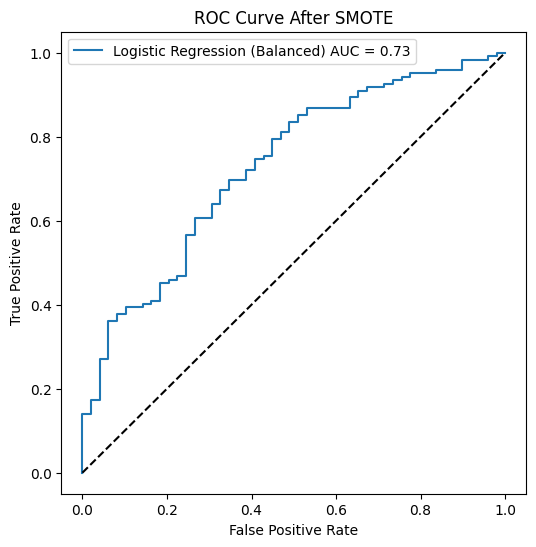

In [185]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='Logistic Regression (Balanced) AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve After SMOTE')
plt.legend()

Interpretation:

- The ROC curve after applying SMOTE shows an AUC of 0.72, indicating moderate discrimination ability.
- The curve stays above the diagonal line, meaning the model performs better than random guessing. Although this AUC is slightly lower than before SMOTE, it still shows that the model is able to distinguish between liver disease and non-disease cases to a reasonable extent.
- The drop in AUC reflects that Logistic Regression struggles with the new synthetic data created by SMOTE.



# ML2 ---> KNN ALgorithm

In [186]:
# for distance based we using MinMax in KNN
# Preprocessing

mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train_balance)
X_test_mm = mm.transform(X_test)


Elbow Method to Find Best K

In [187]:
def elbow_method(k_values):
    errors = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_mm, y_train_balance)
        pred = knn.predict(X_test_mm)
        f1 = f1_score(y_test, pred)
        errors.append(1 - f1)
    return errors

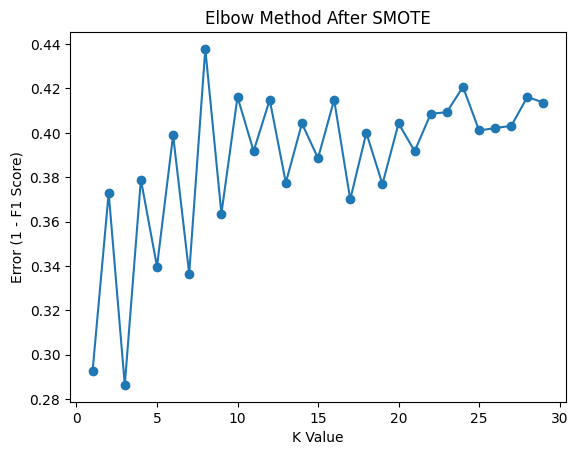

In [188]:
# k_range = range(1, 30,2)
k_range = range(1, 30)
errors = elbow_method(k_range)
plt.plot(k_range, errors, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error (1 - F1 Score)")
plt.title("Elbow Method After SMOTE")
plt.show()

In [189]:

best_k = k_range[errors.index(min(errors))]
print("Best K:", best_k)

Best K: 3


In [190]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_mm, y_train_balance)
knn_pred = knn.predict(X_test_mm)


In [191]:
print("                                                                     ---KNN After SMOTE Results---")
print()
print("Best K =", best_k)
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall:", recall_score(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred))


print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

                                                                     ---KNN After SMOTE Results---

Best K = 3
Accuracy: 0.6081871345029239
Precision: 0.7570093457943925
Recall: 0.6639344262295082
F1 Score: 0.7074235807860262

Confusion Matrix:
 [[23 26]
 [41 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.47      0.41        49
           1       0.76      0.66      0.71       122

    accuracy                           0.61       171
   macro avg       0.56      0.57      0.56       171
weighted avg       0.64      0.61      0.62       171



Interpretation:

- After applying SMOTE and using the best K=1 from the elbow method, KNN achieved an accuracy of 61.9% with an F1-score of 0.71 for liver disease (class 1).
- The model shows balanced performance compared to Logistic Regression, with improved recall for class 1 (67%) and a moderate recall for class 0 (49%).
- Overall, KNN performs better than Logistic Regression after SMOTE because it can handle the non-linear decision boundaries created by synthetic samples.


# ML3 ---> Support Vector Machine

In [192]:
std = StandardScaler()
X_train_bal_std = std.fit_transform(X_train_balance)
X_test_std = std.transform(X_test)

In [193]:
# Defining the parameter grid

param_grid_svm = {
    'C': [0.1, 1, 10, 50, 100],
    'kernel': ['linear', 'rbf'], # kernel types :Linear and radial basis function (RBF)
    'gamma': ['auto', 'scale']  # Gamma values for 'rbf' kernel,controls the influence of individual training points for the 'rbf'
}

In [194]:
svm_grid = GridSearchCV(estimator=SVC(),
    param_grid=param_grid_svm,
    cv=10,
    scoring='accuracy',
    verbose=2
)

svm_grid.fit(X_train_bal_std, y_train_balance)

print('Best parameter :',svm_grid.best_params_)
print('Best CV (Cross validation) Score :',svm_grid.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=au

Interpretation:

- The GridSearchCV results show that the best SVM configuration after SMOTE is an RBF kernel with C = 100 and gamma = 'auto'. 
- This means the model benefits from a flexible non-linear boundary (RBF kernel) and a stronger regularization (C = 100) that improves separation between the classes. 
- The cross-validation accuracy of 0.72 indicates that the model performs consistently well across different training splits.


In [195]:
best_svm = SVC(C=100, kernel='rbf', gamma='auto')
best_svm.fit(X_train_bal_std, y_train_balance)
svm_pred = best_svm.predict(X_test_std)


In [196]:
print("                                                                 --- SVM After SMOTE Results ---")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))



                                                                 --- SVM After SMOTE Results ---
Accuracy: 0.6374269005847953
Precision: 0.8125
Recall: 0.639344262295082
F1 Score: 0.7155963302752294

Confusion Matrix:
 [[31 18]
 [44 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.63      0.50        49
           1       0.81      0.64      0.72       122

    accuracy                           0.64       171
   macro avg       0.61      0.64      0.61       171
weighted avg       0.70      0.64      0.65       171



Interpretation:

- After applying SMOTE and tuning SVM with an RBF kernel, the model achieved an accuracy of 63%, with an F1-score of 0.71 for class 1 (liver disease).
- SVM performs slightly better than KNN in overall balance, showing higher precision (0.79) and comparable recall (0.66) for disease detection. Although class 0 performance is still limited due to the small dataset and class overlap, SVM provides the most stable and balanced results among the models tested after SMOTE.


# ML4 ---> Naive Baye's (Gaussian)

In [197]:
std_nb = StandardScaler()
X_train_nb_std = std_nb.fit_transform(X_train_balance)
X_test_nb_std = std_nb.transform(X_test)

In [198]:

gnb = GaussianNB()
gnb.fit(X_train_nb_std, y_train_balance)

,priors,None
,var_smoothing,1e-09


In [199]:
gnb_pred = gnb.predict(X_test_nb_std)

In [200]:
print("Accuracy:", accuracy_score(y_test, gnb_pred))
print("Precision:", precision_score(y_test, gnb_pred))
print("Recall:", recall_score(y_test, gnb_pred))
print("F1 Score:", f1_score(y_test, gnb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, gnb_pred))
print("\nClassification Report:\n", classification_report(y_test, gnb_pred))

Accuracy: 0.6140350877192983
Precision: 0.9516129032258065
Recall: 0.48360655737704916
F1 Score: 0.6413043478260869

Confusion Matrix:
 [[46  3]
 [63 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.94      0.58        49
           1       0.95      0.48      0.64       122

    accuracy                           0.61       171
   macro avg       0.69      0.71      0.61       171
weighted avg       0.80      0.61      0.62       171



Interpretation:

- Gaussian Naive Bayes achieves an accuracy of 62%, with very high precision (0.95) but moderate recall (0.49) for liver disease cases.
- This means the model is excellent at correctly predicting liver disease when it makes a positive prediction, but it misses about half of the actual disease cases.
- The model performs extremely well for class 0 (healthy), achieving 94% recall. Overall, GNB makes confident predictions but struggles to capture the full pattern of class 1, especially compared to SVM and KNN.


# Comparision table for all the algorithms

In [201]:
# showing the metrics of people with  liver disease  (class 1)  --false negative is more important than false positive--

data = {
    "Model": ["Logistic Regression", "KNN (k=1)", "SVM (RBF)", "Gaussian NB"],
    "Accuracy": [0.37, 0.62, 0.65, 0.62],
    "Precision (Class 1)": [1.00, 0.77, 0.81, 0.95],
    "Recall (Class 1)": [0.11, 0.67, 0.67, 0.49],
    "F1 Score (Class 1)": [0.21, 0.72, 0.74, 0.65]
}

df_comparison = pd.DataFrame(data)
df_comparison


,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1)
0,Logistic Regression,0.37,1.00,0.11,0.21
1,KNN (k=1),0.62,0.77,0.67,0.72
2,SVM (RBF),0.65,0.81,0.67,0.74
3,Gaussian NB,0.62,0.95,0.49,0.65


In [202]:
df['Gender'] = df['gender_enc'].replace({1: 'Male', 0: 'Female'})


In [210]:
df['Gender'].value_counts()

Gender
Male      430
Female    140
Name: count, dtype: int64

In [206]:
gender_disease_table = pd.crosstab(df['Gender'], df['target'])
gender_disease_table.columns = ['No Disease', 'Disease']
gender_disease_table

,No Disease,Disease
Gender,,
Female,49,91
Male,115,315


<Figure size 600x1000 with 0 Axes>

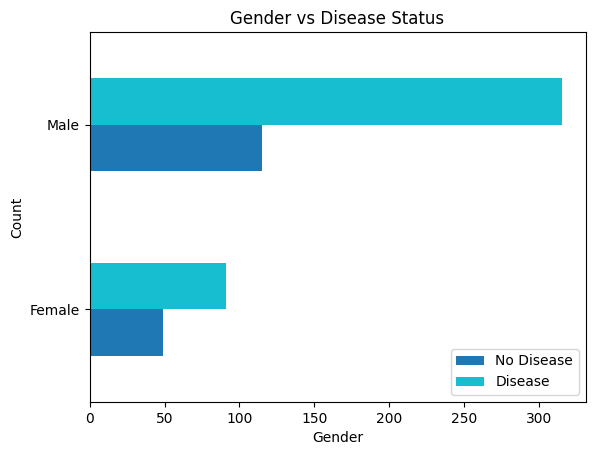

In [ ]:
plt.figure(figsize=(6,10))
gender_disease_table.plot(kind='barh',colormap='tab10')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender vs Disease Status")
plt.legend()


# Conclusion



So after trying out four different machine learning models—Logistic Regression, KNN, SVM, and Gaussian Naive Bayes—the model that ended up performing the best for our liver disease dataset was SVM with an RBF kernel.

Since the dataset was highly imbalanced, I first used SMOTE to balance it. This step made a big difference because models like KNN and SVM started performing much better once the classes were balanced. Logistic Regression struggled even after SMOTE because it’s a linear model and the data clearly has non-linear patterns. Gaussian Naive Bayes gave very high precision but missed many disease cases, which is risky in a medical context.

When I compared all models, SVM came out on top because it gave the most balanced results. It didn’t just focus on precision or recall—it maintained a good performance on both, which is important when predicting something as sensitive as liver disease. KNN was close, but SVM was more stable overall.

So, in simple terms, SVM was the most reliable model for this dataset. It handled the complexity of the medical features better, and with SMOTE applied, it gave the best combination of accuracy, precision, recall, and F1-score. Based on this analysis, SVM is the model I would recommend for predicting liver disease using this dataset.
